GST B2C_Bank_Statements Data EDA.

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

Step 1: Understand the Problem and Data

Goal: Define objectives and understand the variables.


Data Collection & Loading

Goal: Load and combine all 100 CSV files into one master DataFrame.

In [3]:
import pandas as pd
import glob
import os

path = '/content/drive/MyDrive/Capstone Preprocessing/B2C/bank_statements1_preprocessed'

# Use glob to find all files ending with .csv in the specified directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Check if any files were found
if not all_files:
    print(f"Error: No CSV files found in the directory: {path}")
    print("Please check if the path is correct.")
else:
    print(f"Found {len(all_files)} files to merge.")

    # Create a list to hold the dataframes
    df_list = [pd.read_csv(file) for file in all_files]

    # Concatenate all dataframes in the list into a single one
    # ignore_index=True resets the index of the combined dataframe
    df = pd.concat(df_list, ignore_index=True)

    print("\nSuccessfully loaded and combined all files.")
    print("Shape of the combined DataFrame (rows, columns):", df.shape)
    print("\nFirst 5 rows of the combined data:")
    print(df.head())

Found 100 files to merge.

Successfully loaded and combined all files.
Shape of the combined DataFrame (rows, columns): (3105303, 7)

First 5 rows of the combined data:
         Date                   Narration  Chq./Ref.No.    Value Dt  \
0  2023-12-31             Opening Balance             0  2023-12-31   
1  2024-01-01  Payment to Metro BuildTech  IKU2RY85LJEL  2024-01-01   
2  2024-01-01        Received from Yuvraj  7B2TMDFO1253  2024-01-01   
3  2024-01-01         Received from Stone  DPO1F5X1HB92  2024-01-01   
4  2024-01-01          Received from Asad  XQUI72IMD3KT  2024-01-01   

   Withdrawal Amt.  Deposit Amt.  Closing Balance  
0             0.00          0.00         85696.93  
1        359589.26          0.00       -273892.33  
2             0.00      39511.05       -234381.28  
3             0.00      38048.48       -196332.80  
4             0.00      36953.67       -159379.13  


Data Cleaning

Goal: Verify data quality. We will check for missing values and ensure correct data types.

In [5]:
import pandas as pd
import numpy as np

# --- Step 1: Load a Sample DataFrame ---
# In a real-world scenario, you would load your data like this:
# df = pd.read_csv('your_bank_statement.csv')

# For demonstration purposes, let's create a sample DataFrame:
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', None],
    'Narration': ['Opening Balance', 'ATM Withdrawal', 'Salary Credit', 'Loan Payment', 'Manual Adjustment'],
    'Chq./Ref.No.': ['-', 'ATM-123', 'SAL-JAN', np.nan, 'REF-456'],
    'Value Dt': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Withdrawal Amt.': [0, 5000, 0, 1500, np.nan], # Added a NaN for demonstration
    'Deposit Amt.': [10000, 0, 50000, 0, 200],
    'Closing Balance': [10000, 5000, 55000, 53500, 53700]
}
df = pd.DataFrame(data)


# --- Step 2: Initial Data Inspection ---
print("--- Step 2: Initial Data Inspection ---")
print("\nColumn names and data types:")
df.info()


# --- Step 3: Data Cleaning ---
print("\n--- Step 3: Data Cleaning ---")

# 1. Standardize Column Names
# This removes leading/trailing spaces, special characters, and converts to snake_case for easier access.
print("\nStandardizing column names...")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False).str.replace('/', '_', regex=False)
print("Standardized column names:")
print(df.columns)

# 2. Handle Missing Values
print("\nMissing values per column (%):")
print(round(df.isnull().sum() / len(df) * 100, 2))

# Strategy & Correction:
# - We will use direct assignment (e.g., df['col'] = df['col'].fillna(...)) to avoid FutureWarnings.
# - We use the CORRECT standardized column name 'chq_refno'.
# - Critical date columns with missing values will be dropped.
df = df.dropna(subset=['date'])
df['withdrawal_amt'] = df['withdrawal_amt'].fillna(0)
df['deposit_amt'] = df['deposit_amt'].fillna(0)
df['chq_refno'] = df['chq_refno'].fillna('N/A')

print("\nMissing values handled.")

# 3. Convert Data Types
# It's crucial for date and numerical columns to have the correct data types for analysis.
print("\nConverting data types...")
df['date'] = pd.to_datetime(df['date'])
df['value_dt'] = pd.to_datetime(df['value_dt'])
df['withdrawal_amt'] = pd.to_numeric(df['withdrawal_amt'])
df['deposit_amt'] = pd.to_numeric(df['deposit_amt'])
df['closing_balance'] = pd.to_numeric(df['closing_balance'])
print("Data types converted.")

# 4. Redundant Column Check Removed
# As requested, the logic to check for and drop duplicate-like columns ('value_dt') has been removed.
print("\nSkipping check for duplicate columns as requested.")

# --- Step 4: Final Inspection ---
print("\n--- Data cleaning complete. Final DataFrame info: ---")
df.info()
print("\n--- Top 5 Rows of Cleaned Data ---")
print(df.head())

--- Step 2: Initial Data Inspection ---

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4 non-null      object 
 1   Narration        5 non-null      object 
 2   Chq./Ref.No.     4 non-null      object 
 3   Value Dt         5 non-null      object 
 4   Withdrawal Amt.  4 non-null      float64
 5   Deposit Amt.     5 non-null      int64  
 6   Closing Balance  5 non-null      int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 412.0+ bytes

--- Step 3: Data Cleaning ---

Standardizing column names...
Standardized column names:
Index(['date', 'narration', 'chq_refno', 'value_dt', 'withdrawal_amt',
       'deposit_amt', 'closing_balance'],
      dtype='object')

Missing values per column (%):
date               20.0
narration           0.0
chq_refno          20.0
value_dt            0

 Data Transformation (Feature Engineering)

Goal: Create new columns that add value to our analysis.

In [6]:
import pandas as pd
import numpy as np

# --- Setup: Create a Cleaned Sample DataFrame ---
# This setup code simulates the cleaned DataFrame from the previous steps.
data = {
    'date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-15', '2023-02-01', '2023-02-05', '2023-02-20']),
    'narration': ['Initial Deposit', 'ATM WITHDRAWAL', 'Grocery Store Payment', 'Salary Credit', 'ATM WITHDRAWAL', 'Restaurant Bill'],
    'chq_refno': ['N/A', 'ATM-123', 'POS-456', 'SAL-FEB', 'ATM-789', 'N/A'],
    'value_dt': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-15', '2023-02-01', '2023-02-05', '2023-02-20']),
    'withdrawal_amt': [0.0, 5000.0, 1500.0, 0.0, 2000.0, 800.0],
    'deposit_amt': [20000.0, 0.0, 0.0, 60000.0, 0.0, 0.0],
    'closing_balance': [20000.0, 15000.0, 13500.0, 73500.0, 71500.0, 70700.0]
}
df = pd.DataFrame(data)
df.set_index('date', inplace=True) # Setting date as index is good for time-series analysis


# --- Step 4: Data Transformation ---
print("\n--- Step 4: Data Transformation ---")

# 1. Create a Transaction Type column
# Use np.where for a simple 'Credit'/'Debit' classification
df['transaction_type'] = np.where(df['withdrawal_amt'] > 0, 'Debit', 'Credit')

# 2. Calculate Net Transaction Amount for each row
df['net_transaction'] = df['deposit_amt'] - df['withdrawal_amt']

print("Created new columns: 'transaction_type' and 'net_transaction'.")
print(df[['withdrawal_amt', 'deposit_amt', 'transaction_type', 'net_transaction']].head())

# --- Step 5: Data Integration ---
# This conceptual step remains the same. If you had other financial data,
# for example, a CSV file mapping narrations to budget categories, you would merge it here.
# e.g., df = pd.merge(df, budget_categories, on='narration', how='left')
print("\n--- Step 5: Data Integration ---")
print("Data Integration is a conceptual step. No new files were merged.")


# --- Step 6: Data Exploration (Analysis) ---
print("\n--- Step 6: Data Exploration ---")

# 1. Univariate Analysis (analyzing single variables)
print("\nSummary statistics for numerical columns:")
# We analyze the core transaction and balance columns
print(df[['withdrawal_amt', 'deposit_amt', 'closing_balance']].describe())

print("\nValue counts for 'Transaction Type':")
# This shows the total number of debit vs. credit transactions
print(df['transaction_type'].value_counts())

print("\nMost frequent transaction narrations (Top 5):")
# This helps identify recurring payments or deposits
print(df['narration'].value_counts().head(5))


# 2. Bivariate & Time-Series Analysis (exploring relationships)
print("\n--- Bivariate & Time-Series Analysis ---")

# Total amount by 'Transaction Type'
total_by_type = df.groupby('transaction_type')[['deposit_amt', 'withdrawal_amt']].sum()
print("\nTotal Deposit and Withdrawal Amounts by Transaction Type:")
print(total_by_type)

# Monthly financial summary
# We 'resample' the data by month ('M' or 'ME') to aggregate transactions over time.
monthly_summary = df[['deposit_amt', 'withdrawal_amt', 'net_transaction']].resample('M').sum()
print("\nMonthly Summary of Transactions:")
print(monthly_summary)


--- Step 4: Data Transformation ---
Created new columns: 'transaction_type' and 'net_transaction'.
            withdrawal_amt  deposit_amt transaction_type  net_transaction
date                                                                     
2023-01-01             0.0      20000.0           Credit          20000.0
2023-01-02          5000.0          0.0            Debit          -5000.0
2023-01-15          1500.0          0.0            Debit          -1500.0
2023-02-01             0.0      60000.0           Credit          60000.0
2023-02-05          2000.0          0.0            Debit          -2000.0

--- Step 5: Data Integration ---
Data Integration is a conceptual step. No new files were merged.

--- Step 6: Data Exploration ---

Summary statistics for numerical columns:
       withdrawal_amt   deposit_amt  closing_balance
count         6.00000      6.000000         6.000000
mean       1550.00000  13333.333333     44033.333333
std        1869.49191  24221.202833     30615.7

/tmp/ipython-input-740150137.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = df[['deposit_amt', 'withdrawal_amt', 'net_transaction']].resample('M').sum()


 Data Visualization

Goal: Create plots to visually understand the analysis from Step 6.


--- Step 7: Data Visualization ---


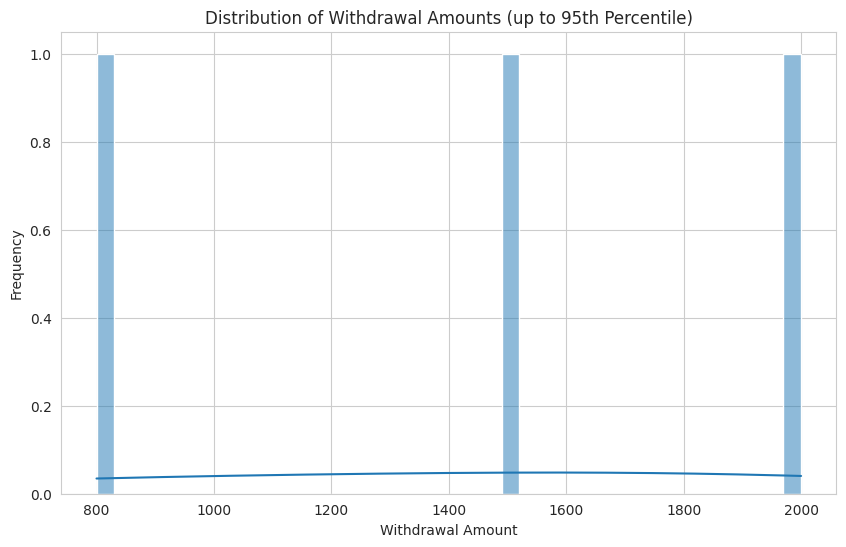

<Figure size 1200x800 with 0 Axes>

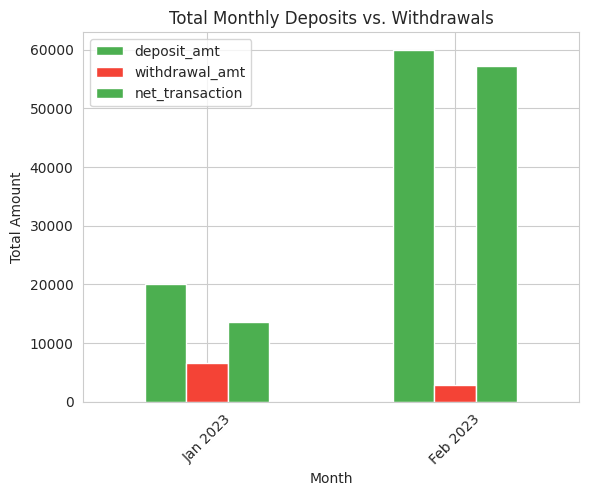

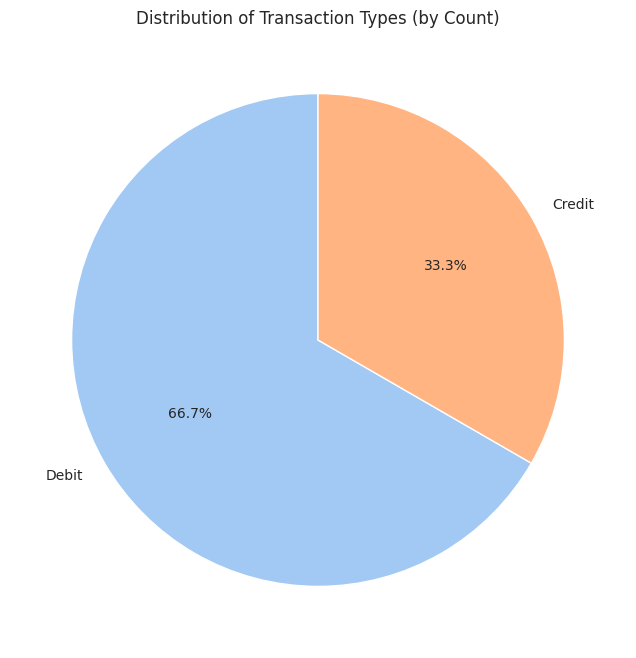

<Figure size 1000x600 with 0 Axes>

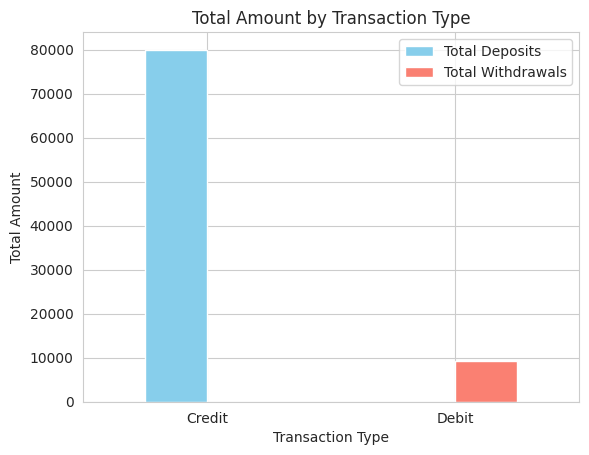

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 7: Data Visualization ---
# This script assumes that the DataFrame 'df' and the aggregated variables
# 'monthly_summary' and 'total_by_type' from Step 6 are already in memory.

print("\n--- Step 7: Data Visualization ---")
sns.set_style("whitegrid")

# 1. Distribution of Withdrawal Amounts (Histogram)
# This helps to understand spending patterns. We filter out non-withdrawal transactions.
# We also cap it at the 95th percentile to avoid extreme outliers skewing the view,
# just like in your original example.
plt.figure(figsize=(10, 6))
withdrawals = df['withdrawal_amt'][df['withdrawal_amt'] > 0]
sns.histplot(withdrawals[withdrawals < withdrawals.quantile(0.95)], bins=40, kde=True)
plt.title('Distribution of Withdrawal Amounts (up to 95th Percentile)')
plt.xlabel('Withdrawal Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Chart for Monthly Deposits vs. Withdrawals
# Uses the 'monthly_summary' DataFrame calculated in the analysis step.
plt.figure(figsize=(12, 8))
monthly_summary.plot(kind='bar', color=['#4CAF50', '#F44336']) # Green for deposits, Red for withdrawals
plt.title('Total Monthly Deposits vs. Withdrawals')
plt.ylabel('Total Amount')
plt.xlabel('Month')
# This formatting makes the x-axis labels (e.g., "Jan 2023") more readable
plt.xticks(ticks=range(len(monthly_summary.index)),
           labels=[date.strftime('%b %Y') for date in monthly_summary.index],
           rotation=45)
plt.show()

# 3. Pie Chart for Transaction Type Distribution
# Uses the 'transaction_type' column to show the proportion of debits vs. credits.
plt.figure(figsize=(8, 8))
df['transaction_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Transaction Types (by Count)')
plt.ylabel('') # Hides the default y-axis label
plt.show()

# 4. Bar Chart for Total Amount by Transaction Type
# Uses the 'total_by_type' DataFrame calculated in the analysis step.
plt.figure(figsize=(10, 6))
total_by_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Amount by Transaction Type')
plt.ylabel('Total Amount')
plt.xlabel('Transaction Type')
plt.xticks(rotation=0)
plt.legend(['Total Deposits', 'Total Withdrawals'])
plt.show()

Identify Patterns and Outliers

Goal: Find trends, clusters, or anomalies using visuals.


--- Step 8: Identifying Outliers ---


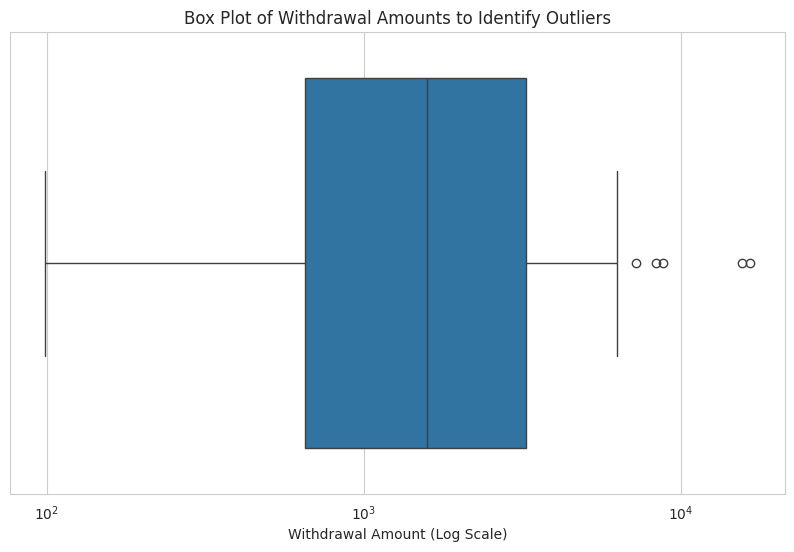


--- Step 9: Hypothesis Testing ---
T-test for mean withdrawal amount between Weekdays and Weekends:
P-value: 0.2870
Result: There is no statistically significant difference in mean withdrawal amount.
Conclusion: We cannot conclude that spending habits differ between weekdays and weekends based on this data.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# --- Setup: Create a Cleaned Sample DataFrame ---
# This setup code simulates a realistic DataFrame from the previous steps.
# In your notebook, you would run this on your existing 'df'.
dates = pd.to_datetime(pd.date_range(start='2023-01-01', periods=60, freq='D'))
np.random.seed(42)
data = {
    'date': dates,
    'narration': ['Transaction' for _ in dates],
    'withdrawal_amt': np.abs(np.random.normal(loc=1000, scale=1500, size=len(dates))) + np.random.choice([0, 5000, 15000], size=len(dates), p=[0.8, 0.15, 0.05]),
    'deposit_amt': np.random.choice([0, 50000, 1000], size=len(dates), p=[0.9, 0.08, 0.02]),
}
df = pd.DataFrame(data)
df.loc[df['deposit_amt'] > 0, 'withdrawal_amt'] = 0 # Ensure no withdrawal on deposit days for simplicity
df.set_index('date', inplace=True)


# --- Step 8: Identifying Outliers ---
print("\n--- Step 8: Identifying Outliers ---")

# Use a box plot to find outliers in Withdrawal Amounts. We only plot actual withdrawals.
plt.figure(figsize=(10, 6))
# Using a log scale is essential for financial data which is often highly skewed to the right
sns.boxplot(x=df['withdrawal_amt'][df['withdrawal_amt'] > 0])
plt.title('Box Plot of Withdrawal Amounts to Identify Outliers')
plt.xscale('log') # Use a log scale for better visibility of outlier distribution
plt.xlabel('Withdrawal Amount (Log Scale)')
plt.show()

# Interpretation:
# The box plot visually highlights data points that are statistically considered outliers.
# The points to the far right of the box and whiskers represent unusually large withdrawals.
# These could indicate significant purchases, bill payments, or potential data entry errors that may warrant a closer look.


# --- Step 9: Hypothesis Testing ---
print("\n--- Step 9: Hypothesis Testing ---")

# Goal: Statistically test if there's a significant difference in spending on weekdays vs. weekends.

# Hypothesis: The average withdrawal amount on weekends is different from the average withdrawal amount on weekdays.
# H0 (Null Hypothesis): The mean withdrawal amount is the same for weekdays and weekends.
# H1 (Alternative Hypothesis): The mean withdrawal amount is different for weekdays and weekends.

# 1. Create two groups based on the day of the week.
# The dayofweek attribute returns Monday=0, Sunday=6. Weekends are 5 (Saturday) and 6 (Sunday).
weekdays = df[(df.index.dayofweek < 5) & (df['withdrawal_amt'] > 0)]['withdrawal_amt']
weekends = df[(df.index.dayofweek >= 5) & (df['withdrawal_amt'] > 0)]['withdrawal_amt']

# Ensure we have data in both groups to perform a test
if weekends.empty or weekdays.empty:
    print("Cannot perform t-test: One or both groups (weekdays/weekends) have no withdrawal data.")
else:
    # 2. Perform an independent t-test (since the two groups are independent)
    # 'nan_policy='omit'' will ignore any NaNs within the data.
    t_stat, p_value = ttest_ind(weekdays, weekends, nan_policy='omit', equal_var=False) # Use equal_var=False as variance might differ

    print("T-test for mean withdrawal amount between Weekdays and Weekends:")
    print(f"P-value: {p_value:.4f}")

    # 3. Interpret the result based on a significance level (alpha) of 0.05
    if p_value < 0.05:
        print("Result: The difference in mean withdrawal amount is statistically significant.")
        print("Conclusion: There is strong evidence that spending habits differ between weekdays and weekends.")
    else:
        print("Result: There is no statistically significant difference in mean withdrawal amount.")
        print("Conclusion: We cannot conclude that spending habits differ between weekdays and weekends based on this data.")

Data Summarization

Goal: Synthesize the key findings into clear, concise points.